In [4]:
#   [Movies Analysis]

In [5]:
# author = Anh Trung

In [13]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.formula.api as sm

import json

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_scores
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [14]:
# import DATA FRAME 
movie = pd.read_csv('movie.csv')
credit=pd.read_csv('credit.csv')

In [19]:
print (movie.shape)
movie.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
print (credit.shape)
credit.head()

(4803, 3)


,movie_id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
## What areas have the most influence on revenue?

In [32]:
### Filter dataframe into 2 patitions, numerics and non-numerics

str_list = [] # columns with strings
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
        
#Remains of the dataframe is numeric columns by inversion
num_list = movie.columns.difference(str_list)


#Build a new dataframe with only numeric values
num_movie = movie[num_list]
num_movie.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [36]:
# remove NA value fromw new dataframe 
num_movie = num_movie.fillna(value=0, axis=1)
# Make data into Standard Scale with Skitlearn
X = num_movie.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [38]:
#show the numerical standarized Movie dataframe
list(movie)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

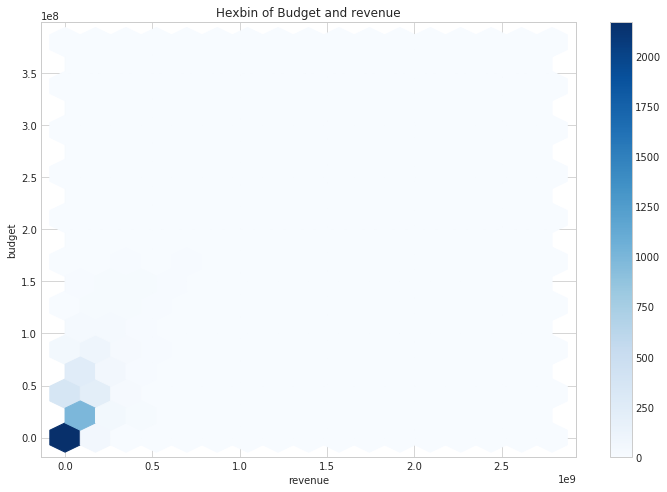

In [65]:
# Visualize the relation between Budget and Revenue
movie.plot(y ='budget', x = 'revenue', kind='hexbin', gridsize = 16, sharex = False,
          colormap = 'Blues', title='Hexbin of Budget and revenue', figsize = (12,8))

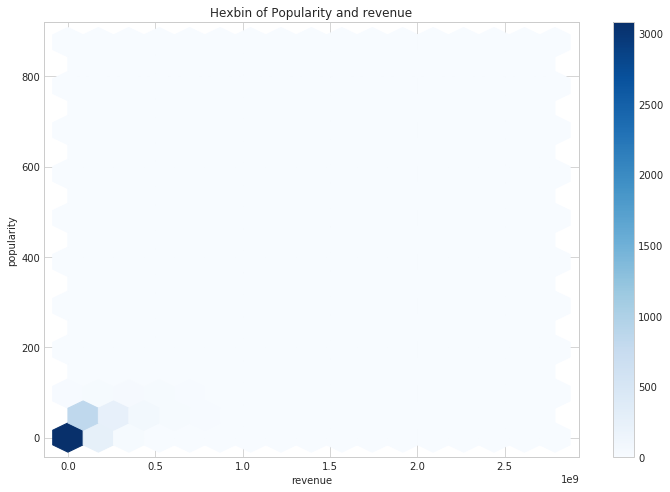

In [80]:
# Visualize the relation between Popularity and Revenue
movie.plot(y ='popularity', x = 'revenue', kind='hexbin', gridsize = 16, sharex = False,
          colormap = 'Blues', title='Hexbin of Popularity and revenue', figsize = (12,8))

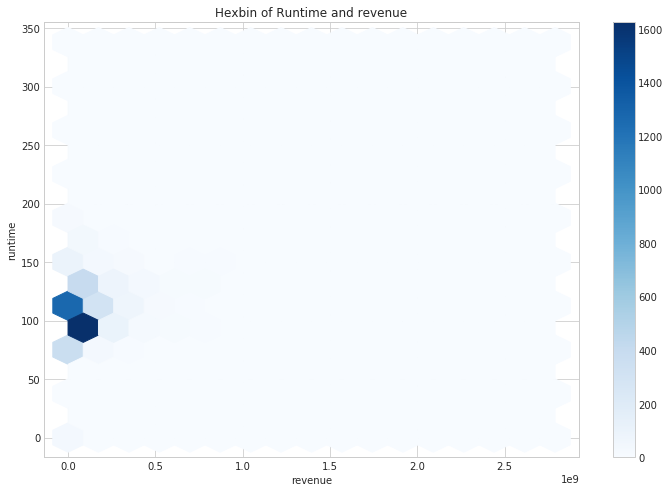

In [67]:
# Visualize the relation between Runtime and Revenue
movie.plot(y ='runtime', x = 'revenue', kind='hexbin', gridsize = 16, sharex = False,
          colormap = 'Blues', title='Hexbin of Runtime and revenue', figsize = (12,8))

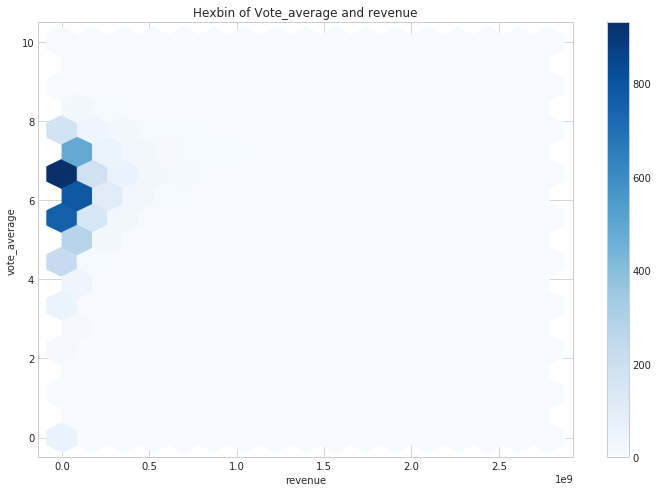

In [79]:
# Visualize the relation between Vote and Revenue
movie.plot(y ='vote_average', x = 'revenue', kind='hexbin', gridsize = 16, sharex = False,
          colormap = 'Blues', title='Hexbin of Vote_average and revenue', figsize = (12,8))

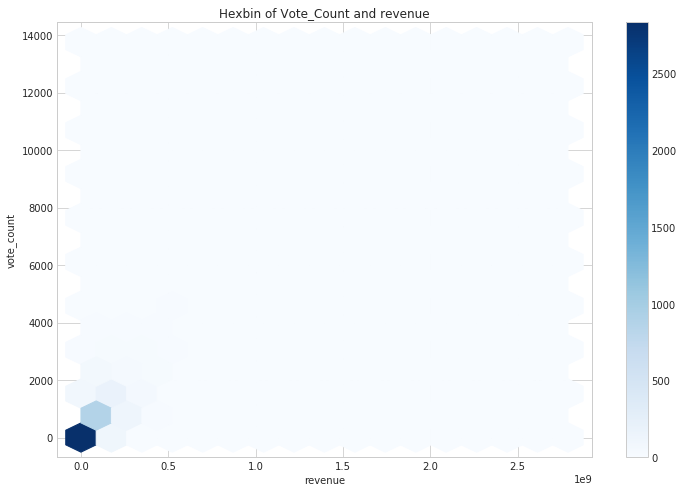

In [71]:
# Visualize the relation between Vote Count and Revenue
movie.plot(y ='vote_count', x = 'revenue', kind='hexbin', gridsize = 16, sharex = False,
          colormap = 'Blues', title='Hexbin of Vote_Count and revenue', figsize = (12,8))

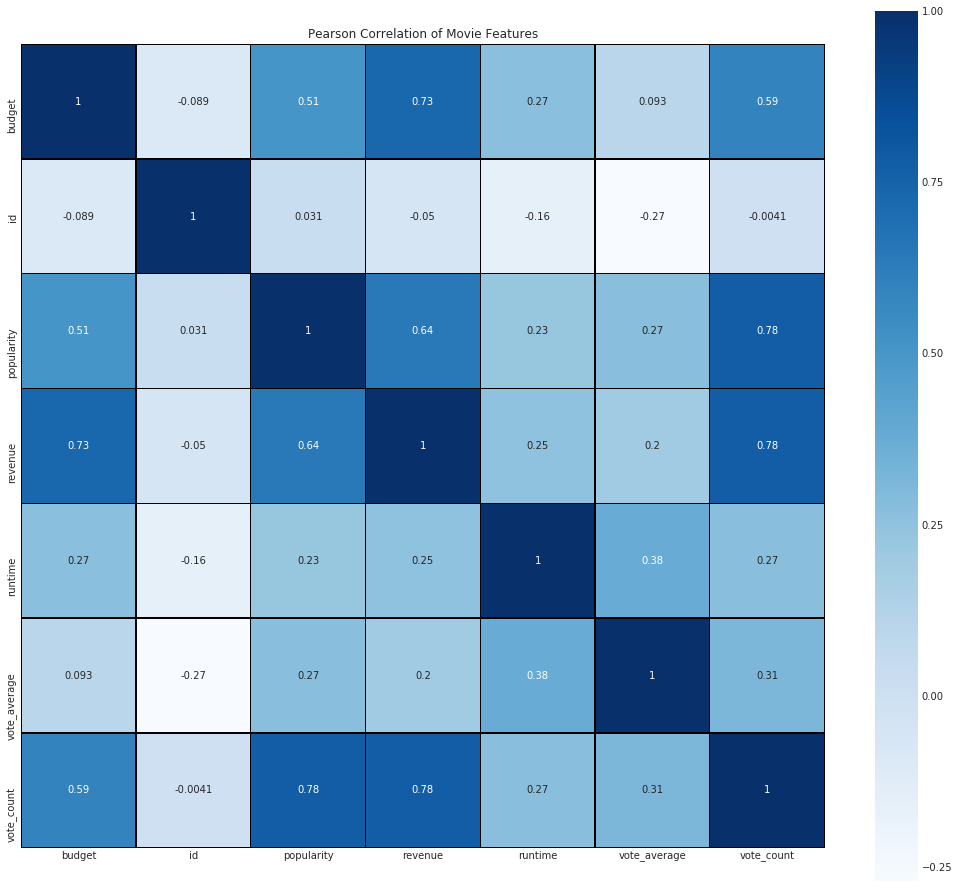

In [73]:
# Visualize with Heatmap of all numerics features
f, ax = plt.subplots(figsize=(18,16))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(num_movie.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="Blues", linecolor='black', annot=True)


In [75]:
#Resuls is:
# Most affected features on revenue are 
# 1 -> Vote count
# 2 -> Budget
# 3 -> Revenue